# Scrape Data from the web


In [1]:
#import the beatifulSoup library to scrape our website
from bs4 import  BeautifulSoup
import requests
#scrap wikipedia page about Anthropology
url_Anth="https://ar.wikipedia.org/wiki/علم_الإنسان"
source_Anth=requests.get(url_Anth).content.decode('UTF-8')
soup_Anth = BeautifulSoup(source_Anth,'html.parser') 
#find the class that has the informations we want to scrape
text_Anth=soup_Anth.find(class_="mw-parser-output")
Anthropology_paragraphs=text_Anth.select("div[class=mw-parser-output] > p")
#create a List that contain our paragraphs with labels 
Anthropology_list=[]
for i in Anthropology_paragraphs:
    Anthropology_list.append([str(i.get_text()),"Anthropology"])


In [2]:
#scrap e3arabi web page about Anthropology
url_Anth="https://e3arabi.com/علم-الاجتماع/مفهوم-الانثروبولوجيا-وطبيعتها-واهمي"
source_Anth=requests.get(url_Anth).content.decode('UTF-8')
soup_Anth = BeautifulSoup(source_Anth,'html.parser') 
#find the class that has the informations we want to scrape
Anthropology_paragraphs=soup_Anth.select("div.entry-content.entry.clearfix > p")
#add the data to existing Anthropology list
for i in Anthropology_paragraphs[1:]:
    Anthropology_list.append([str(i.get_text()),"Anthropology"])

In [3]:
#scrap feedo web page about Anthropology
url_Anth="https://www.feedo.net/ScienceAndTechnology/Science/ScientificThinking/Anthropology.htm"
source_Anth=requests.get(url_Anth).content.decode('UTF-8')
soup_Anth = BeautifulSoup(source_Anth,'html.parser') 
#find the class that has the informations we want to scrape
text_Anth=soup_Anth.find(class_="body")
#delete picture tags from Data
for i in text_Anth.select("td > p > picture"):
    i.extract()

Anthropology_paragraphs=text_Anth.select("td > p")
#add the data to existing Anthropology list
for i in Anthropology_paragraphs:
    Anthropology_list.append([str(i.get_text()),"Anthropology"])

In [4]:
#count Anthropology paragraphs
len(Anthropology_list)

63

In [5]:
#scrap wikipedia page about Astronomy 
url_ast="https://ar.wikipedia.org/wiki/علم_الفلك"
source_ast =requests.get(url_ast).content.decode('UTF-8')
soup_ast = BeautifulSoup(source_ast,'html.parser') 
#find the class that has the informations we want to scrape
text_ast=soup_ast.find(id='bodyContent')
paragraphs_ast=text_ast.select("div[class=mw-parser-output] > p")
Astronomy_list=[]
#create a List that contain our astronomy paragraphs with labels 
for i in paragraphs_ast:
    Astronomy_list.append([str(i.get_text()),'Astronomy'])

In [6]:
#count Astronomy paragraphs
len(Astronomy_list)

100

In [7]:
#concatenate astronomy and Anthropology Data 
Data=Anthropology_list+Astronomy_list

In [8]:
len(Data)

163

In [9]:
import pandas as pd
DataFrame=pd.DataFrame(Data,columns=['Content','Topic'])

In [10]:
DataFrame

,Content,Topic
0,علم الإنسان أو الأنثروبولوجيا (بالإنجليزية: An...,Anthropology
1,يتفرع علم الإنسان إلى كل من علم الإنسان الاجتم...,Anthropology
2,يُعرَّف علم الإنسان العامّ بأنه:\n,Anthropology
3,وهو ما يعني أن علم الإنسان هو علم الإنسان طبيع...,Anthropology
4,يقسم علم الإنسان إلى أربعة أقسام رئيسة من وجهة...,Anthropology
...,...,...
158,يلاحظ هواة علم الفلك مجموعة متنوعة من الأجسام ...,Astronomy
159,ويعمل معظم الهواة في الأطوال الموجية المرئية، ...,Astronomy
160,واستمر الفلكيين الهواة في تقديم إسهامات علمية ...,Astronomy
161,مع أن النظام العلمي لعلم الفلك قد خطى خطوات ها...,Astronomy


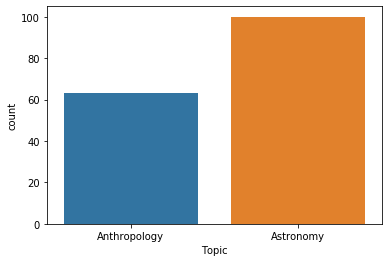

In [11]:
import seaborn as sns
sns.countplot(x='Topic',data = DataFrame)

# Save Data to a CSV file

In [12]:
DataFrame.to_csv('nlpdata.csv', index=False)